# Praktikum 2

Pada praktikum ini kita akan menggunakan library [Keras](https://keras.io/) untuk menggunakan JST. Keras adalah API tingkat tinggi untuk membangun JST dengan mudah, sedangkan TensorFlow adalah framework yang mendukung Keras.

## Langkah:

1. Import library.
2. Load dataset.
3. Bangun model.
4. Kompilasi dan latih model.
5. Evaluasi hasil.

## Klasifikasi Data Iris

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [3]:
import sklearn
print(sklearn.__version__)

1.6.1


In [4]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (handle scikit-learn API differences)
from sklearn.preprocessing import OneHotEncoder
try:
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    # scikit-learn >=1.2 uses `sparse_output` instead of `sparse`
    encoder = OneHotEncoder(sparse_output=False)

y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\broto\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4000 - loss: 1.0940
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4000 - loss: 1.0940
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5500 - loss: 0.9908 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5500 - loss: 0.9908 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6000 - loss: 0.9631 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6000 - loss: 0.9631 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 0.9453 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 0.9453 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 0.9341 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 0.9341 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 0.9265 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.575

In [7]:
# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9000 - loss: 0.5201
Akurasi: 0.8999999761581421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9000 - loss: 0.5201
Akurasi: 0.8999999761581421


## Tugas 2

* Ubah jumlah neuron hidden layer.
* Bandingkan akurasi dengan konfigurasi awal.

In [8]:
# Tugas 2 - Eksperimen: Ubah jumlah neuron pada hidden layers dan bandingkan akurasi
import numpy as np
import tensorflow as tf

# Pastikan data sudah ada (jika user belum menjalankan sel sebelumnya)
try:
    X_train, X_test, y_train, y_test
except NameError:
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    iris = load_iris()
    X = iris.data
    y = iris.target.reshape(-1, 1)
    from sklearn.preprocessing import OneHotEncoder
    try:
        encoder = OneHotEncoder(sparse=False)
    except TypeError:
        encoder = OneHotEncoder(sparse_output=False)
    y = encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tf.random.set_seed(42)
np.random.seed(42)

configs = [
    ("baseline", [10, 8]),
    ("small", [6, 4]),
    ("medium", [32, 16]),
    ("large", [64, 32]),
]

results = []
epochs = 30
batch_size = 8

for name, (n1, n2) in configs:
    print(f"Running {name} -> layers: [{n1}, {n2}]")
    model_exp = tf.keras.Sequential([
        tf.keras.layers.Dense(n1, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(n2, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model_exp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_exp.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    loss, acc = model_exp.evaluate(X_test, y_test, verbose=0)
    print(f" -> test accuracy: {acc:.4f}\n")
    results.append((name, [n1, n2], acc))

# Ringkasan hasil
print("Summary of experiments:")
for name, layers_cfg, acc in results:
    print(f"{name:10s} layers={layers_cfg}  test_acc={acc:.4f}")

Running baseline -> layers: [10, 8]
 -> test accuracy: 0.9667

Running small -> layers: [6, 4]
 -> test accuracy: 0.9667

Running small -> layers: [6, 4]
 -> test accuracy: 0.1333

Running medium -> layers: [32, 16]
 -> test accuracy: 0.1333

Running medium -> layers: [32, 16]
 -> test accuracy: 0.9333

Running large -> layers: [64, 32]
 -> test accuracy: 0.9333

Running large -> layers: [64, 32]
 -> test accuracy: 0.9667

Summary of experiments:
baseline   layers=[10, 8]  test_acc=0.9667
small      layers=[6, 4]  test_acc=0.1333
medium     layers=[32, 16]  test_acc=0.9333
large      layers=[64, 32]  test_acc=0.9667
 -> test accuracy: 0.9667

Summary of experiments:
baseline   layers=[10, 8]  test_acc=0.9667
small      layers=[6, 4]  test_acc=0.1333
medium     layers=[32, 16]  test_acc=0.9333
large      layers=[64, 32]  test_acc=0.9667


## Tugas 3

* Bandingkan Sigmoid vs ReLU pada dataset Iris.
* Catat perbedaan loss dan akurasi.

Training with activation='relu'...
 -> test loss: 0.5367, test acc: 0.8667

Training with activation='sigmoid'...
 -> test loss: 1.0302, test acc: 0.5333

Comparison (loss, accuracy):
relu   -> loss=0.5367, accuracy=0.8667
sigmoid -> loss=1.0302, accuracy=0.5333


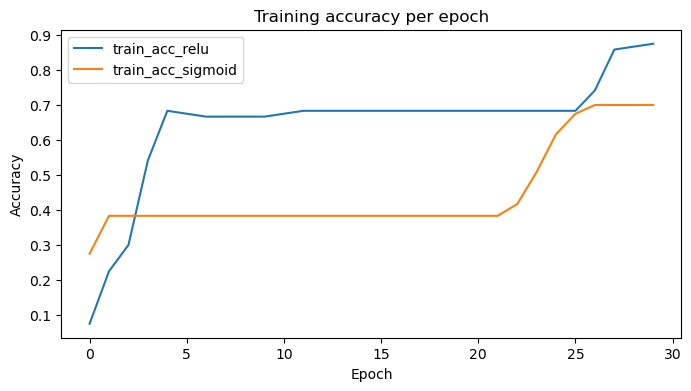

In [9]:
# Tugas 3 - Bandingkan Sigmoid vs ReLU pada dataset Iris
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Pastikan data tersedia
try:
    X_train, X_test, y_train, y_test
except NameError:
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder
    iris = load_iris()
    X = iris.data
    y = iris.target.reshape(-1, 1)
    try:
        encoder = OneHotEncoder(sparse=False)
    except TypeError:
        encoder = OneHotEncoder(sparse_output=False)
    y = encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

def build_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

results = {}
epochs = 30
batch_size = 8

for act in ['relu', 'sigmoid']:
    print(f"Training with activation='{act}'...")
    model_act = build_model(act)
    hist = model_act.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    loss, acc = model_act.evaluate(X_test, y_test, verbose=0)
    results[act] = {'loss': loss, 'accuracy': acc, 'history': hist.history}
    print(f" -> test loss: {loss:.4f}, test acc: {acc:.4f}\n")

# Summary table
print('Comparison (loss, accuracy):')
for act, r in results.items():
    print(f"{act:6s} -> loss={r['loss']:.4f}, accuracy={r['accuracy']:.4f}")

# Plot accuracy curves for both activations
plt.figure(figsize=(8,4))
for act, r in results.items():
    plt.plot(r['history']['accuracy'], label=f"train_acc_{act}")
plt.title('Training accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
